Imports 


In [22]:
import numpy as np
import scipy as scipy
from scipy.sparse import spdiags
import matplotlib.pylab as plt
from scipy import sparse
from scipy.sparse import csr_matrix
from scipy.sparse import diags
from scipy.sparse.linalg import inv
from scipy.sparse import random
from scipy.sparse.linalg import norm
import time
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import spsolve


lap.m into python code & function to calculate Norm from 1a)


In [8]:
def lap(n,d):
  e = np.ones(n)
  data = np.array([e, -2*e, e])
  diag = np.array([-1, 0, 1])
  A1 = -scipy.sparse.spdiags(data, diag, n, n)
  I1 = sparse.eye(n,n)
  A = A1  
  I = I1
  for k in range(1, d):
    A = sparse.kron(A,I1) + sparse.kron(I,A1)
    I = sparse.kron(I, I1)
  return A

def giveNorm(r, b):
  return norm(r)/norm(b)

Jacobi method (function)






In [18]:
def jacobi(A, N):
  M = diags(A.diagonal(), 0)
  
  T = A - M
  
  M = sparse.csr_matrix.todense(M)[0].flat[0]
  
  b = scipy.sparse.random(N, 1, density=1)
  X = sparse.csr_matrix(np.ones((N,1))) * 0
  Mi = sparse.csr_matrix(np.ones((N,1)))/M
  Xvec = []
  PxVec = []
  k = 0
 
  while True:
    X =  np.multiply(Mi.toarray(),(b-T.dot(X).toarray()))
    X = sparse.csr_matrix(X)
    px = giveNorm(b-A.dot(X), b)

    PxVec.append(px)
    Xvec.append(X.toarray())
    k += 1
    
    if px < 1e-7:
      # print(X.toarray())
      break
  return Xvec, PxVec, k

Conjugate method (function)


In [17]:
def conjugate(A, N):
  b = scipy.sparse.random(N, 1, density=1)
  X = sparse.csr_matrix(np.ones((N,1))) * 0
  p = X #p-1
  beta = sparse.csr_matrix(0)
  r = b.toarray() 
  r = sparse.csr_matrix(r) #r0
  Xvec = []
  PxVec = []

  for k in range(0, N):
    pk = r + beta.multiply(p) # pk
    Apk = A.dot(pk) # A*Pk
    alpha = csr_matrix.transpose(pk).dot(r)/csr_matrix.transpose(pk).dot(Apk) 
    alpha = sparse.csr_matrix(alpha) # alphak
    Xk = X + alpha.multiply(pk) # Xk+1
    rk = r - alpha.multiply(Apk) # rk+1

    if k > 0:
      beta = csr_matrix.transpose(rk).dot(rk)/(csr_matrix.transpose(r).dot(r)) # Bk
      beta = sparse.csr_matrix(beta)
    # uppdating
    p = pk
    r = rk
    X = Xk
    px = giveNorm(b-A.dot(Xk), b)
    PxVec.append(px)
    Xvec.append(X.toarray())
    if px < 1e-10:
      #print(px)
      break

  return Xvec, PxVec,k, b

Plot for semilogy


In [11]:
def pltsemilogy(r, k, n, Method, d):
  plt.semilogy(k[0],r[0])
  plt.semilogy(k[1],r[1])
  plt.semilogy(k[2],r[2])
  plt.semilogy(k[3],r[3])
  plt.title(str(Method) + ", d = "+str(d))
  plt.xlabel('k', fontsize=18)
  plt.ylabel('r', fontsize=18)
  plt.legend(["N ="+str(n[0]), "N ="+str(n[1]), "N ="+str(n[2]), "N ="+str(n[3])])
  return

Jacobi method. Running with 4 different N values


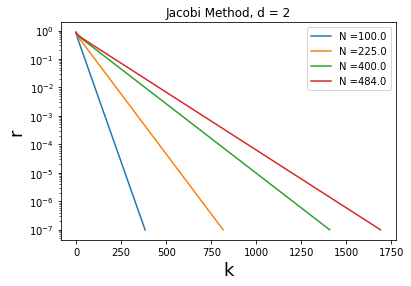

In [24]:

n = [10, 15, 20, 22]
d = 2
RList = []
kList = []
NList = np.zeros(4)
for i in range(len(n)):
  N = np.power(n[i],d)
  NList[i] = N
  A = lap(n[i],d)
  X, R, k= jacobi(A, N)
  RList.append(R)
  kList.append(list(range(0, k)))
pltsemilogy(RList,kList,NList, "Jacobi Method", d)

conjugate gradient method. Running for 4 different N values. At the end: Comparing conjugate gradinet method with spsolve from scipy



In [21]:
n = [10]
d = 2
RList = []
kList = []
NList = np.zeros(4)
for i in range(len(n)):
  N = np.power(n[i],d)
  NList[i] = N
  A = lap(n[i],d)
  start = time.time()
  X, R, k, b= conjugate(A, N)
  end = time.time()
  print(f"Runtime of the Conjugate gradient method is {end - start}")
  RList.append(R)
  kList.append(list(range(0, k+1)))
if len(n) == 4:
  pltsemilogy(RList,kList,NList, "Conjucate Method", d)


N = np.power(n[0],d)
start = time.time()
x = spsolve(A, b)
end = time.time()
print(f"Runtime of the spsolve is {end - start}")
# diff
# print(x-np.transpose(X[k])[0])



Runtime of the Conjugate gradient method is 0.13783693313598633
Runtime of the spsolve is 0.0008578300476074219
